In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
train_df = pd.read_csv("cpu-full-b.csv", parse_dates=[0], infer_datetime_format=True)  
train_df.head()

,datetime,cpu
0,2017-01-27 18:42:00,1.14
1,2017-01-27 18:43:00,1.10
2,2017-01-27 18:44:00,1.09
3,2017-01-27 18:45:00,1.08
4,2017-01-27 18:46:00,1.08


In [ ]:
test_df = pd.read_csv("cpu-test-a.csv", parse_dates=[0], infer_datetime_format=True)
test_df.head()

,datetime,cpu
0,2017-01-28 01:42:00,2.19
1,2017-01-28 01:43:00,1.97
2,2017-01-28 01:44:00,2.15
3,2017-01-28 01:45:00,1.94
4,2017-01-28 01:46:00,1.81


In [ ]:
train_df['Label'] = 0
test_df['Label'] = 0

In [ ]:
train_df['cpu'].max()

2.83

In [ ]:
test_df['cpu'].max()

2.19

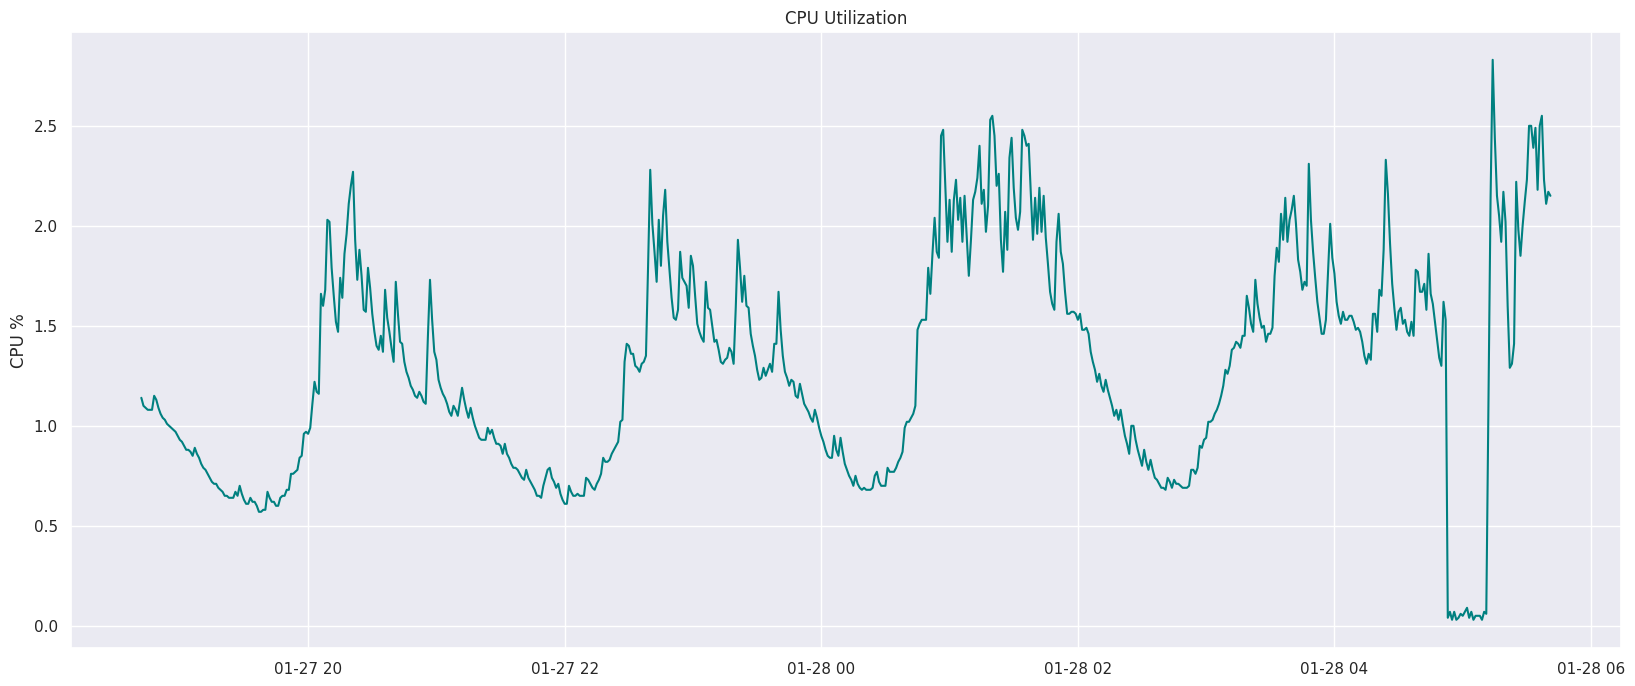

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(train_df['datetime'], train_df['cpu'], color='teal')
plt.ylabel('CPU %')
plt.title('CPU Utilization')
plt.show()

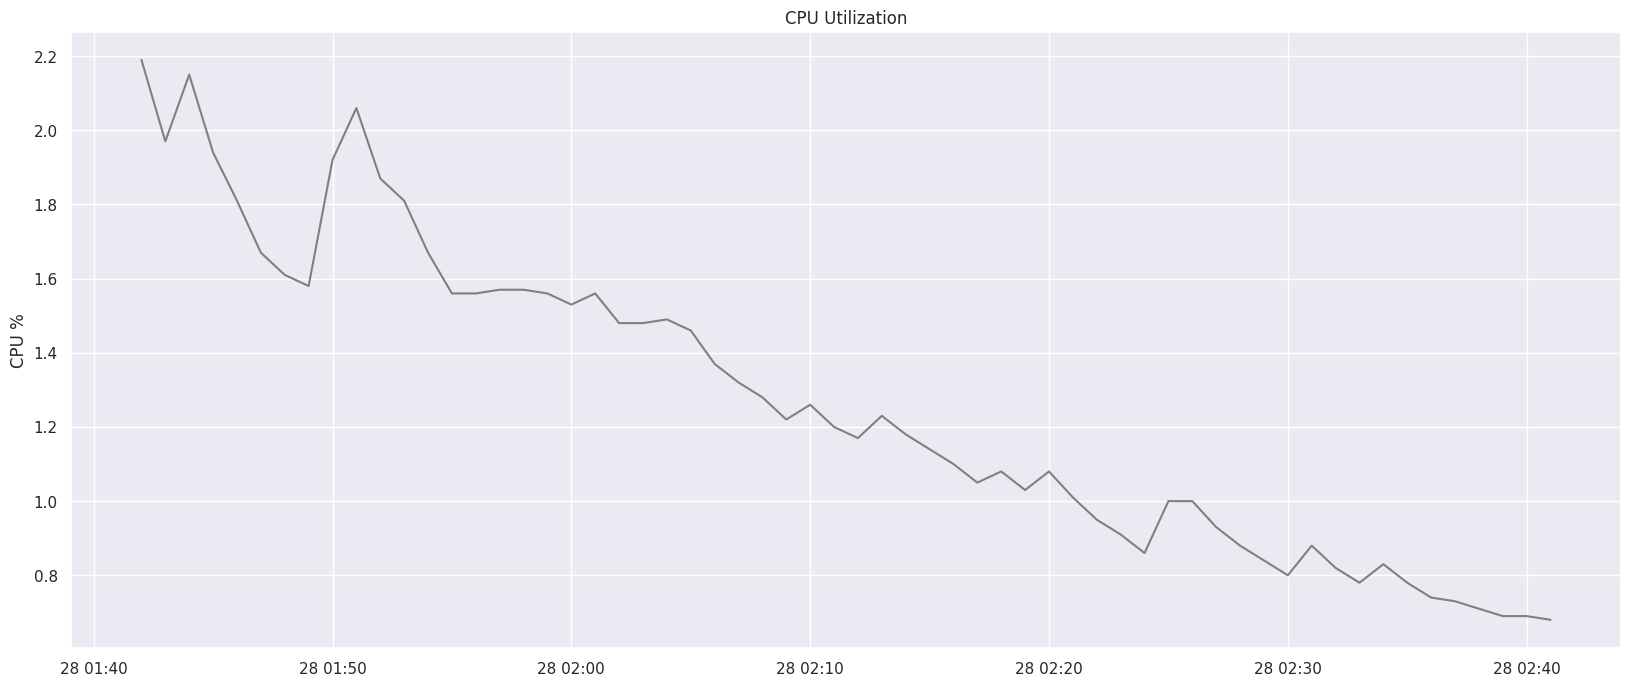

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(test_df['datetime'], test_df['cpu'], color='grey')
plt.ylabel('CPU %')
plt.title('CPU Utilization')
plt.show()

In [ ]:
train_df.loc[train_df["cpu"] > 2.25, "Label"] = 1
train_df.head()

,datetime,cpu,Label
0,2017-01-27 18:42:00,1.14,0
1,2017-01-27 18:43:00,1.10,0
2,2017-01-27 18:44:00,1.09,0
3,2017-01-27 18:45:00,1.08,0
4,2017-01-27 18:46:00,1.08,0


In [ ]:
test_df.loc[test_df["cpu"] > 2.0, "Label"] = 1
test_df.head()

,datetime,cpu,Label
0,2017-01-28 01:42:00,2.19,1
1,2017-01-28 01:43:00,1.97,0
2,2017-01-28 01:44:00,2.15,1
3,2017-01-28 01:45:00,1.94,0
4,2017-01-28 01:46:00,1.81,0


In [ ]:
train_df['Label'].value_counts()

0    635
1     25
Name: Label, dtype: int64

In [ ]:
test_df['Label'].value_counts()

0    57
1     3
Name: Label, dtype: int64

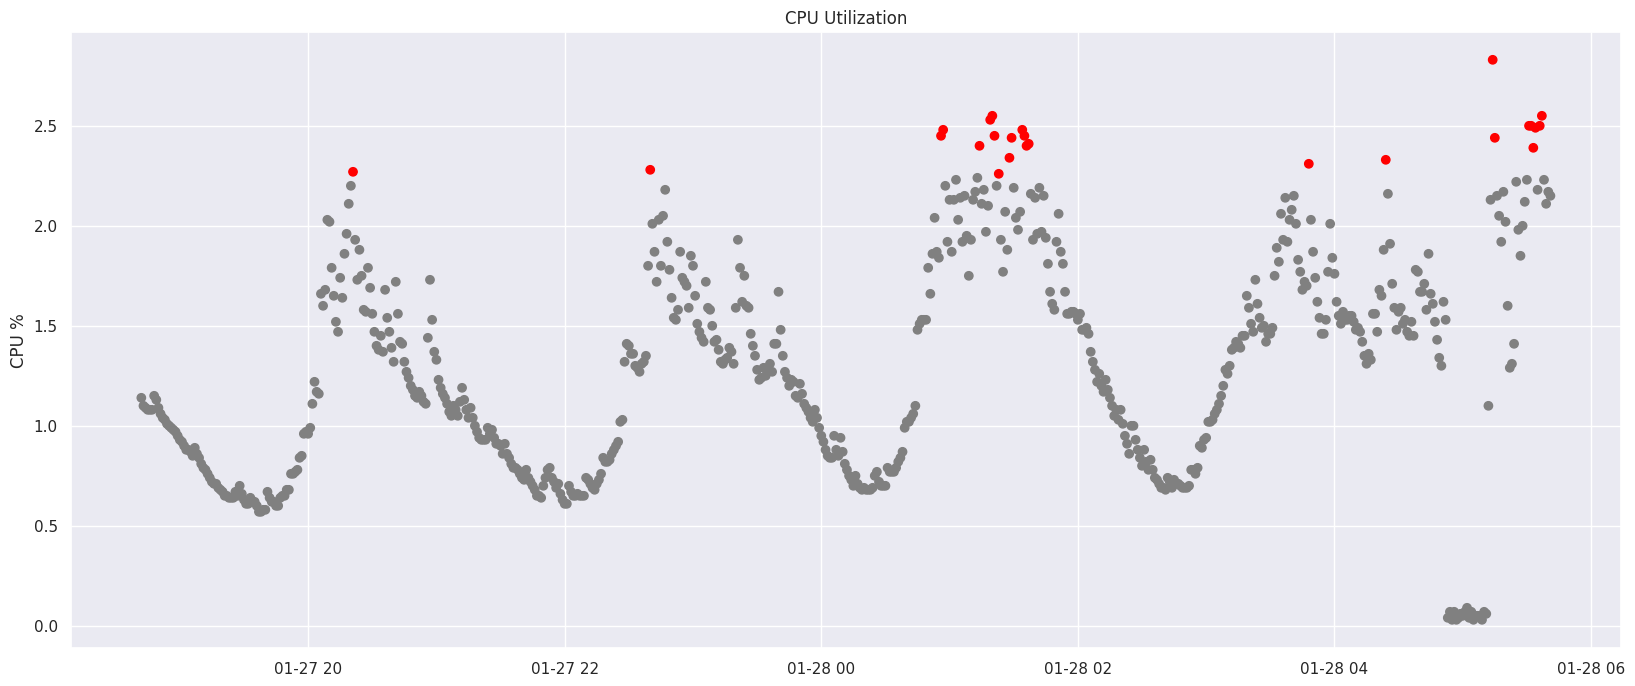

In [ ]:
plt.figure(figsize=(20,8))
colors = ['red' if (x == 1) else 'gray' for x in train_df['Label']]
plt.scatter(train_df['datetime'], train_df['cpu'], color=colors)
plt.ylabel('CPU %')
plt.title('CPU Utilization')
plt.show()

In [ ]:
train_df['Label'].dtype

dtype('int64')

In [ ]:
train_X = train_df['cpu']
train_Y = train_df['Label']
test_X = test_df['cpu']
test_Y = test_df['Label']

In [ ]:
train_X = train_X.values.reshape(-1, 1)
train_Y = train_Y.values.reshape(-1, 1)

In [ ]:
test_X  = test_X.values.reshape(-1, 1)
test_Y  = test_Y.values.reshape(-1, 1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifiplt.figure(figsize=(20,8))
plt.plot(train_df['datetime'], train_df['cpu'], color='teal')
plt.ylabel('CPU %')
plt.title('CPU Utilization')
plt.show()er(criterion = "entropy")   
model.fit(train_X, train_Y)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_preds = model.predict(test_X)

Text(78.75, 0.5, 'Predicted labels')

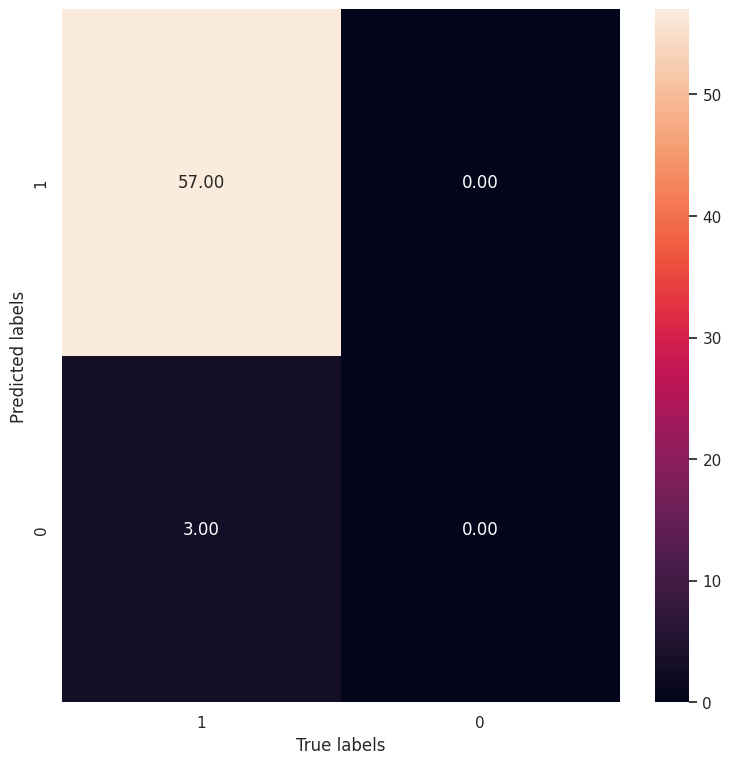

In [ ]:
import sklearn.metrics as metrics
import seaborn as sn

cm_dt = metrics.confusion_matrix(test_Y, y_preds)
sn.heatmap(cm_dt, annot=True,  fmt='.2f', xticklabels = [1, 0] , yticklabels = [1,0],cbar=True)
plt.xlabel('True labels',fontsize=12)
plt.ylabel('Predicted labels',fontsize=12)


In [ ]:
from sklearn.metrics import accuracy_score
print("Detection Accuracy: ",accuracy_score(test_Y, y_preds)*100,"%")

Detection Accuracy:  95.0 %
